# Part I: Importing Libraries and Data

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline
import pprint
plt.style.use('ggplot')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
pull_req_data = pd.read_csv('./preprocessed_data_v4.csv')

In [3]:
pull_req_data.head(n=10)

,slug,gh_team_size,git_num_commits,gh_num_issue_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,churn,...,Id,state,merged,merge_commit_sha,delta_mins_merge,delta_mins_close,updated_at,open_issues_count,watchers_count,subscribers_count
0,getnikola/nikola,10,1,1,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
1,getnikola/nikola,10,1,2,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
2,getnikola/nikola,11,2,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
3,getnikola/nikola,12,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
4,getnikola/nikola,12,1,2,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
5,getnikola/nikola,37,6,1,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
6,getnikola/nikola,46,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
7,getnikola/nikola,81,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
8,magnumripper/JohnTheRipper,8,1,0,5,0,0,22,18,40,...,31939,closed,False,0f78ca884776a6d1b7c2beb9a2116c5511379eef,-1.0000,143.9330,2016-01-01,211,651,78
9,magnumripper/JohnTheRipper,16,1,2,5,0,0,22,18,40,...,31939,closed,False,0f78ca884776a6d1b7c2beb9a2116c5511379eef,-1.0000,143.9330,2016-01-01,211,651,78


In [4]:
pull_req_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36660 entries, 0 to 36659
Data columns (total 40 columns):
slug                           36660 non-null object
gh_team_size                   36660 non-null int64
git_num_commits                36660 non-null int64
gh_num_issue_comments          36660 non-null int64
num_commit_comments            36660 non-null int64
pull_req_comments              36660 non-null int64
gh_num_pr_comments             36660 non-null int64
additions                      36660 non-null int64
deletions                      36660 non-null int64
churn                          36660 non-null int64
changed_files                  36660 non-null int64
gh_src_churn                   36660 non-null int64
gh_test_churn                  36660 non-null int64
gh_files_added                 36660 non-null int64
gh_files_deleted               36660 non-null int64
gh_files_modified              36660 non-null int64
gh_tests_added                 36660 non-null int64
gh_tes

In [5]:
pull_req_data.shape

(36660, 40)

In [6]:
pull_req_data['updated_at'] = pd.to_datetime(pull_req_data['updated_at'])
pull_req_data = pull_req_data.sort_values(by='updated_at')

# Part II: Basic Statistics

In [7]:
pull_req_data.describe()

,gh_team_size,git_num_commits,gh_num_issue_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,churn,changed_files,...,title_len,desc_len,git_num_committers,Id,merged,delta_mins_merge,delta_mins_close,open_issues_count,watchers_count,subscribers_count
count,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,...,36660.000000,36660.000000,36660.000000,36660.000000,36660,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000
mean,25.192908,1.717976,0.725041,3.349864,1.282051,0.658347,349.096154,196.929542,546.025696,16.103737,...,41.748472,283.264239,1.166585,42127.901118,0.698718,376.898921,491.228152,240.539798,1321.610229,112.099127
std,18.414175,2.986504,1.929302,6.354453,6.137098,5.808495,2142.993608,1926.907100,3776.365728,132.722241,...,18.473127,626.966244,0.398094,22269.705614,0.458821,473.073473,487.147591,198.522400,1460.249673,98.744949
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,False,-1.000000,-1.000000,17.000000,7.000000,13.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,7.000000,1.000000,...,27.000000,15.000000,1.000000,31198.000000,0,-1.000000,40.800000,99.000000,212.000000,48.000000
50%,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,4.000000,28.000000,2.000000,...,40.000000,101.000000,1.000000,38912.000000,1,109.617000,302.367000,171.000000,767.000000,85.000000
75%,39.000000,1.000000,1.000000,4.000000,0.000000,0.000000,94.000000,22.000000,133.000000,5.000000,...,54.000000,292.000000,1.000000,59254.000000,1,747.167000,938.100000,324.000000,2217.000000,138.000000
max,89.000000,151.000000,39.000000,136.000000,327.000000,661.000000,116015.000000,43469.000000,159484.000000,2573.000000,...,180.000000,12687.000000,6.000000,81785.000000,True,1439.200000,1439.200000,1818.000000,20119.000000,1033.000000


In [8]:
total_pull_req = len(pull_req_data)
pull_reqs_accepted = len(pull_req_data[pull_req_data["merged"] == True])
print 'Total pull requests in our given data = ', total_pull_req
print 'Accepted pull requests = ', pull_reqs_accepted
print 'Percentage of Accepted pull requests = %.2f' % ((float(pull_reqs_accepted)/float(total_pull_req)) * 100)
#perc_accepted = len(pulllen(pull_req_data[pull_req_data["merged"] == True])

Total pull requests in our given data =  36660
Accepted pull requests =  25615
Percentage of Accepted pull requests = 69.87


# Preprocessing (Split Target Feature and Columns)

In [9]:
def convertToNonNegatives(x):
    return round(x, -1)

In [10]:
pull_req_data['delta_mins_merge'] = pull_req_data['delta_mins_merge'].apply(convertToNonNegatives)
pull_req_data['delta_mins_close'] = pull_req_data['delta_mins_close'].apply(convertToNonNegatives)

In [11]:
pull_req_data['delta_mins_merge'].describe()

count    36660.000000
mean       377.166394
std        472.785774
min         -0.000000
25%         -0.000000
50%        110.000000
75%        750.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

In [12]:
# This will be our target variable
Y = np.array(pull_req_data['merged'].apply(int))
Y
#dropped_features = pull_req_data.drop(['Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
#dropped_features

array([1, 0, 1, ..., 0, 0, 0])

In [13]:
# Drop these features because they are redundant / we dont need to feed them in the ML model
# Note here:- We are removing delta_mins_merge and delta_mins_close because from the user's perspective
# They are not controllable
dropped_features = pull_req_data.drop(['gh_src_churn', 'updated_at', 'delta_mins_merge', 'delta_mins_close', 'slug', 'Id', 'state', 'merged', 'merge_commit_sha'], axis=1)


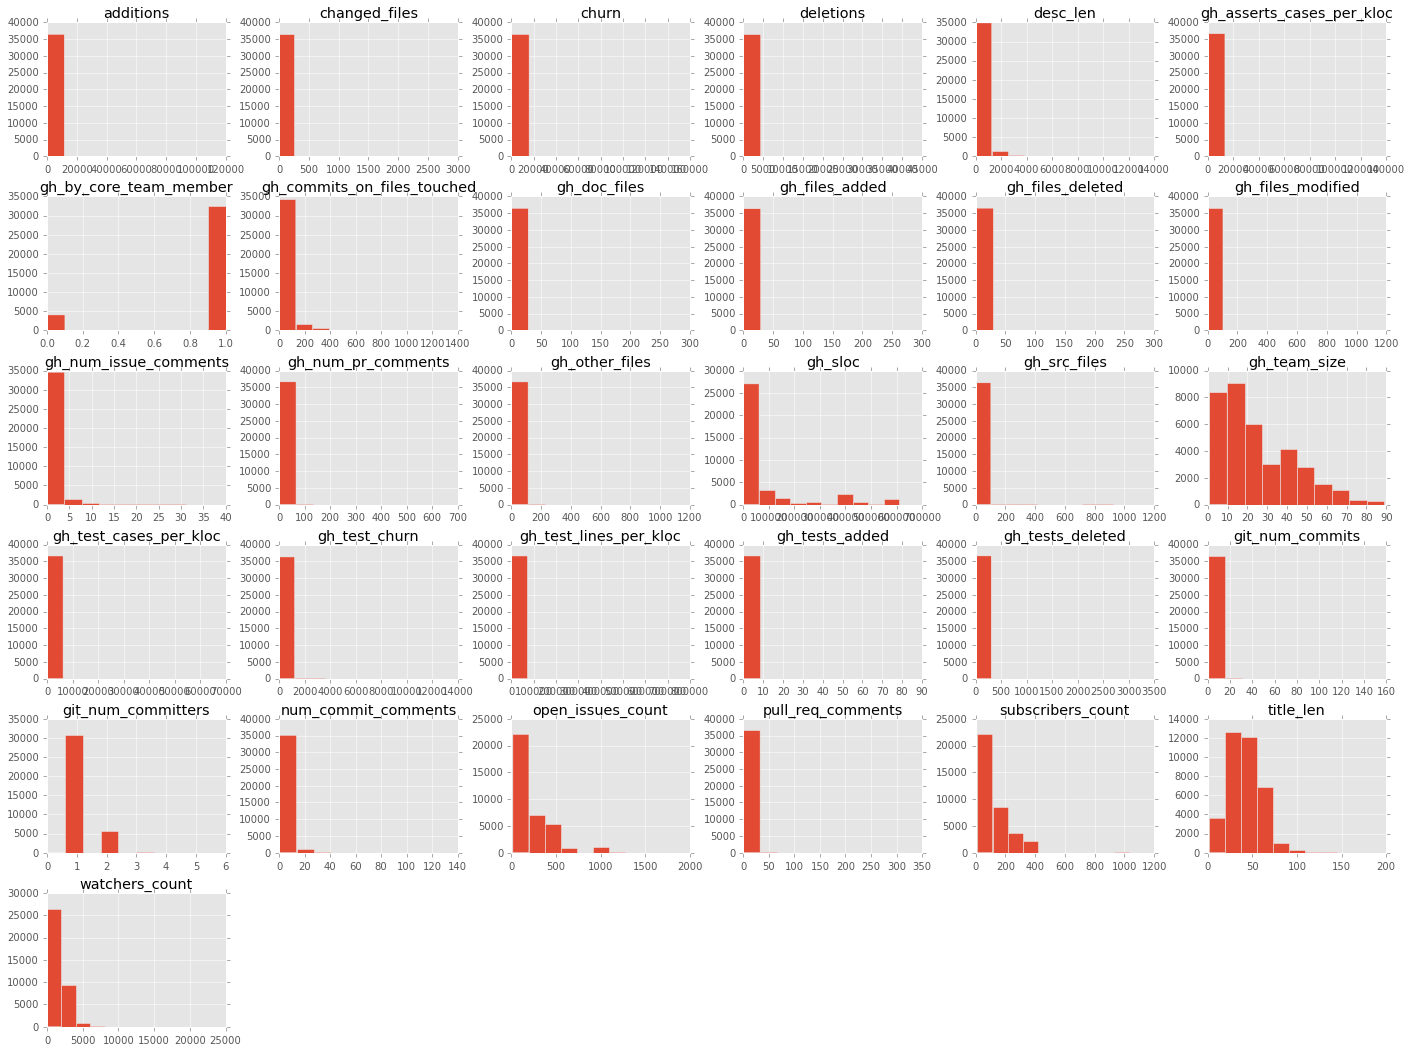

In [14]:
plt.rcParams["figure.figsize"] = [24, 18]
dropped_features.hist()
plt.show()

In [15]:
logged_features = [
    'additions', 
    'changed_files', 
    'churn', 
    'deletions', 
    'desc_len', 
    'gh_asserts_cases_per_kloc',
    'gh_commits_on_files_touched',
    'gh_doc_files',
    'gh_files_added',
    'gh_files_deleted',
    'gh_files_modified',
    'gh_num_issue_comments',
    'gh_num_pr_comments',
    'gh_other_files',
    'gh_sloc',
    'gh_src_files',
    'gh_test_cases_per_kloc',
    'gh_test_churn',
    'gh_test_lines_per_kloc',
    'gh_tests_added',
    'gh_tests_deleted',
    'git_num_commits',
    'git_num_committers',
    'num_commit_comments',
    'open_issues_count',
    'pull_req_comments',
    'subscribers_count',
    'watchers_count'
]

for lg_feature in logged_features:
    dropped_features[lg_feature] = dropped_features[lg_feature].apply(lambda x: np.log(x + 1))


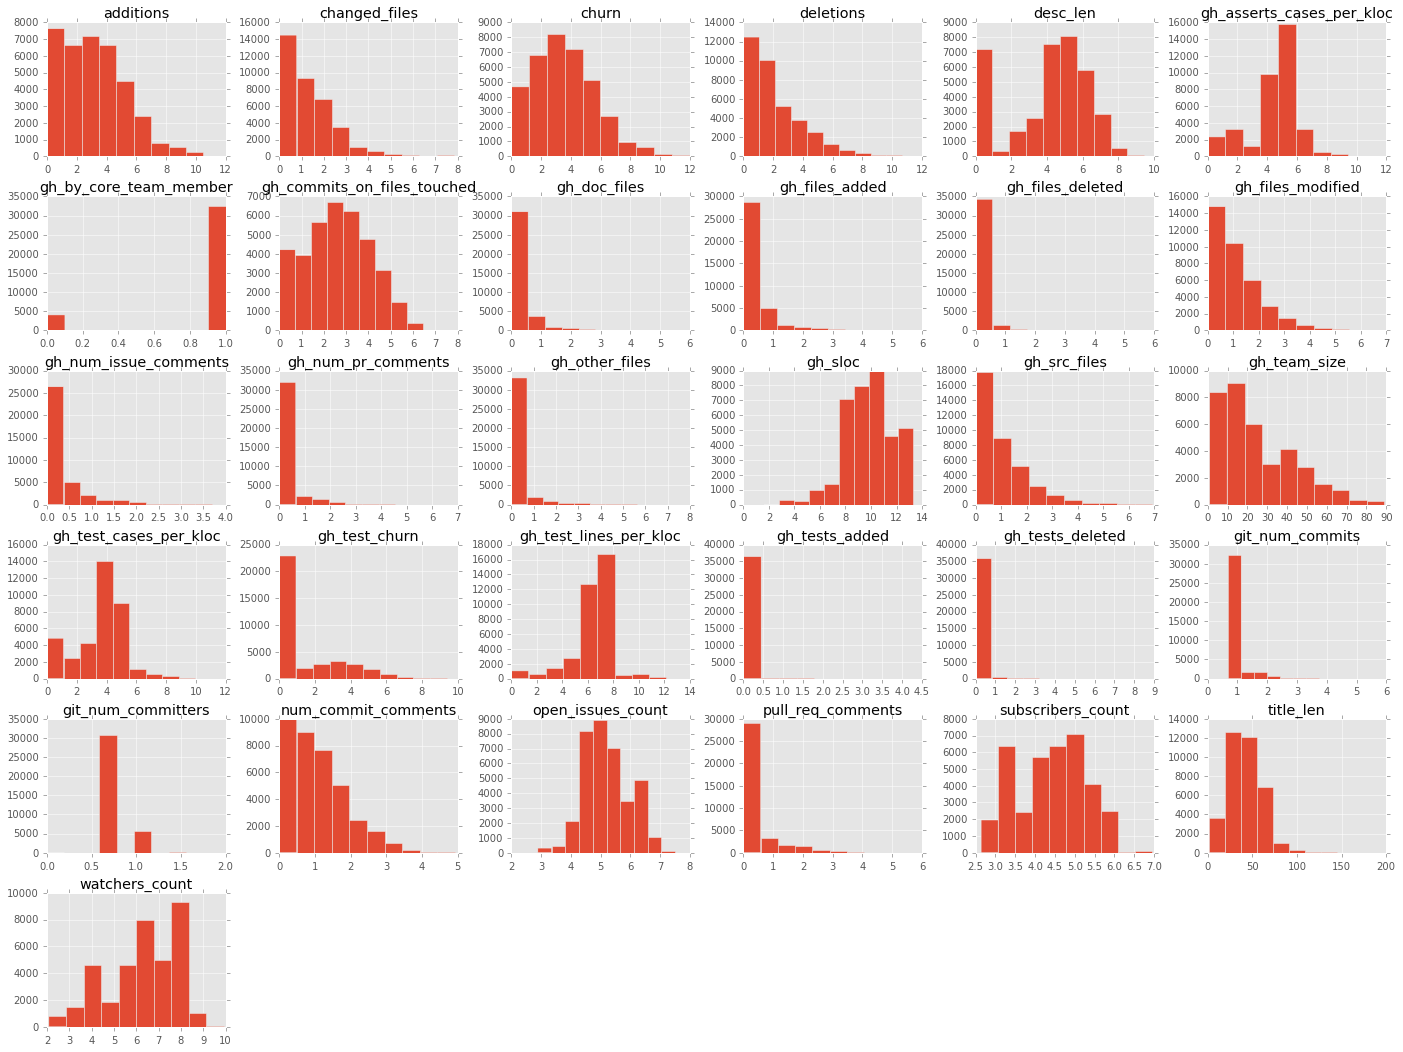

In [90]:
plt.rcParams["figure.figsize"] = [24, 18]
dropped_features.hist()
plt.show()

In [91]:
X = dropped_features.as_matrix().astype(np.float)
X.shape

(36660, 31)

In [92]:
features = dropped_features.columns
pprint.pprint(features)

Index([u'gh_team_size', u'git_num_commits', u'gh_num_issue_comments',
       u'num_commit_comments', u'pull_req_comments', u'gh_num_pr_comments',
       u'additions', u'deletions', u'churn', u'changed_files',
       u'gh_test_churn', u'gh_files_added', u'gh_files_deleted',
       u'gh_files_modified', u'gh_tests_added', u'gh_tests_deleted',
       u'gh_src_files', u'gh_doc_files', u'gh_other_files',
       u'gh_commits_on_files_touched', u'gh_sloc', u'gh_test_lines_per_kloc',
       u'gh_test_cases_per_kloc', u'gh_asserts_cases_per_kloc',
       u'gh_by_core_team_member', u'title_len', u'desc_len',
       u'git_num_committers', u'open_issues_count', u'watchers_count',
       u'subscribers_count'],
      dtype='object')


In [93]:
dropped_features.corr()

,gh_team_size,git_num_commits,gh_num_issue_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,churn,changed_files,...,gh_test_lines_per_kloc,gh_test_cases_per_kloc,gh_asserts_cases_per_kloc,gh_by_core_team_member,title_len,desc_len,git_num_committers,open_issues_count,watchers_count,subscribers_count
gh_team_size,1.000000,0.063158,0.095490,0.038669,0.078318,0.024540,0.005122,0.029852,0.013667,0.022922,...,-0.154294,-0.190388,-0.208799,0.053797,-0.000386,-0.046861,0.101941,0.222334,0.077461,0.069906
git_num_commits,0.063158,1.000000,0.100596,0.007980,0.008148,0.173183,0.005261,0.006465,0.005096,0.002581,...,0.047866,0.049277,0.051725,-0.179681,-0.008670,-0.002390,0.633237,0.037392,0.019509,0.014546
gh_num_issue_comments,0.095490,0.100596,1.000000,0.005397,0.019364,0.323059,0.002291,0.005506,0.002129,0.000082,...,0.053562,0.045452,0.046100,-0.085496,0.001727,-0.006397,0.070770,0.035101,0.014616,0.011339
num_commit_comments,0.038669,0.007980,0.005397,1.000000,0.416180,0.015250,0.237778,0.061915,0.218726,0.139216,...,0.001679,-0.006922,-0.001104,0.007927,0.071041,0.288427,0.016156,0.205594,0.307341,0.295244
pull_req_comments,0.078318,0.008148,0.019364,0.416180,1.000000,0.022085,0.319670,0.156832,0.298444,0.205448,...,0.005161,0.004770,0.005182,0.010923,-0.019692,0.075474,0.011967,0.094360,0.087907,0.079425
gh_num_pr_comments,0.024540,0.173183,0.323059,0.015250,0.022085,1.000000,0.001081,0.006984,0.003117,0.003480,...,0.062503,0.066545,0.064772,-0.053270,-0.008006,-0.004648,0.063898,0.031129,0.016475,0.014131
additions,0.005122,0.005261,0.002291,0.237778,0.319670,0.001081,1.000000,0.609066,0.953103,0.731882,...,-0.001056,-0.004696,-0.001711,0.014659,-0.059622,0.085427,0.000756,0.100301,-0.005966,-0.011544
deletions,0.029852,0.006465,0.005506,0.061915,0.156832,0.006984,0.609066,1.000000,0.749241,0.696490,...,0.000873,-0.004075,0.001289,0.008038,-0.046142,-0.004022,0.007172,0.040918,-0.043345,-0.067824
churn,0.013667,0.005096,0.002129,0.218726,0.298444,0.003117,0.953103,0.749241,1.000000,0.774499,...,0.001166,-0.004156,-0.000164,0.014403,-0.066404,0.065772,0.002180,0.097879,-0.014522,-0.022398
changed_files,0.022922,0.002581,0.000082,0.139216,0.205448,0.003480,0.731882,0.696490,0.774499,1.000000,...,0.002139,-0.005991,0.002694,0.013544,-0.124081,0.022760,0.002745,0.041415,-0.039277,-0.054191


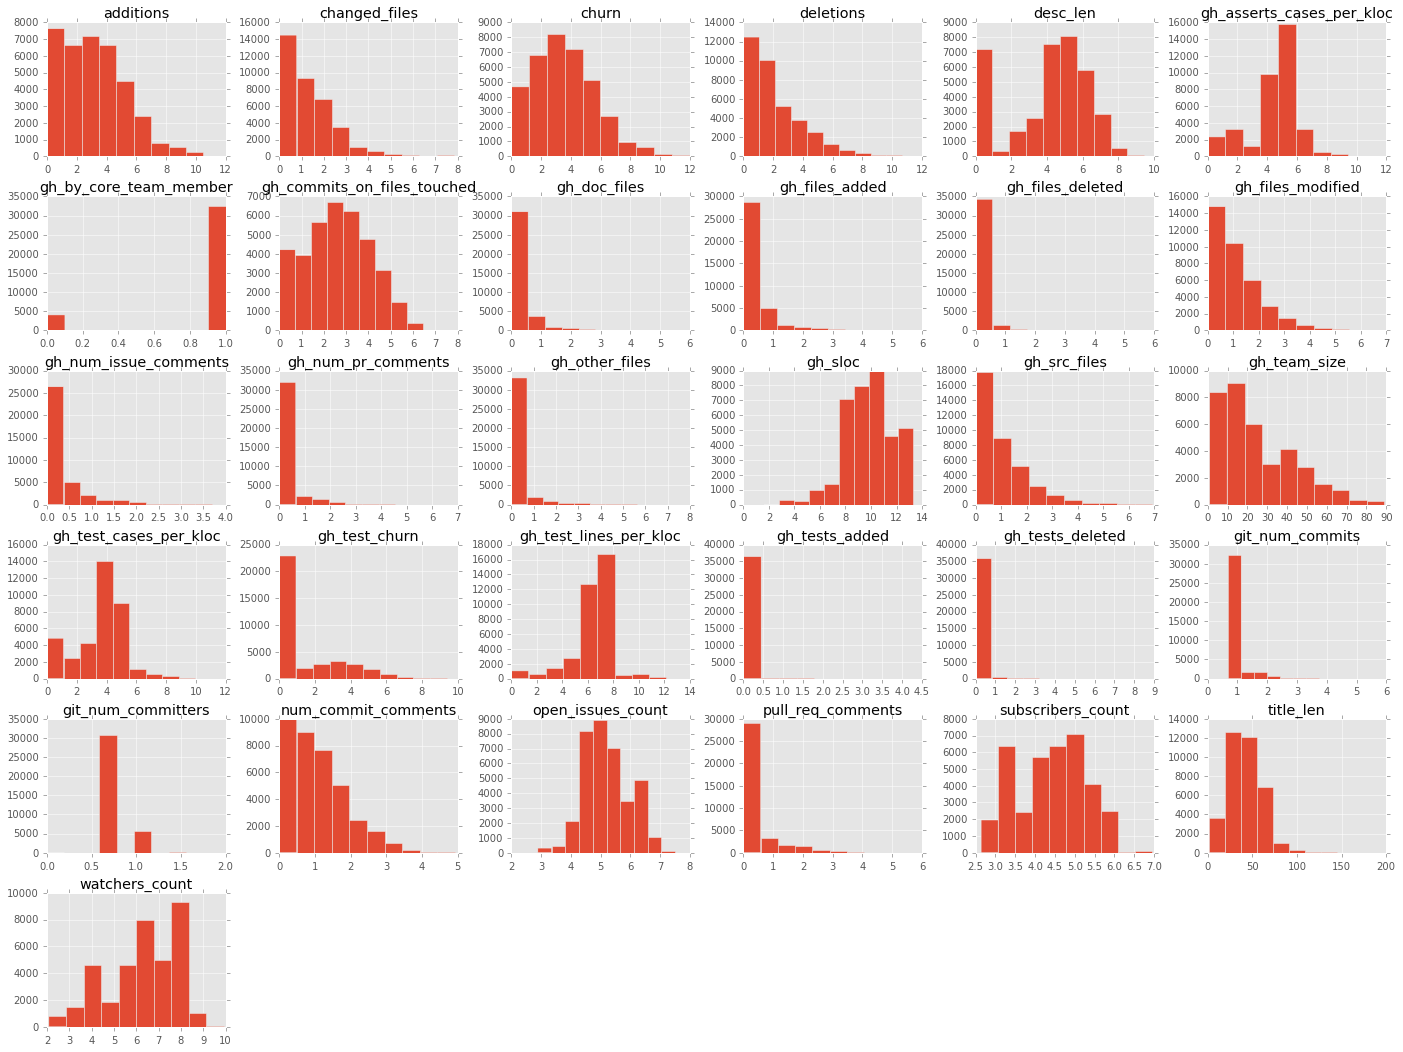

In [94]:
plt.rcParams["figure.figsize"] = [24, 18]
dropped_features.hist()
plt.show()

In [95]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

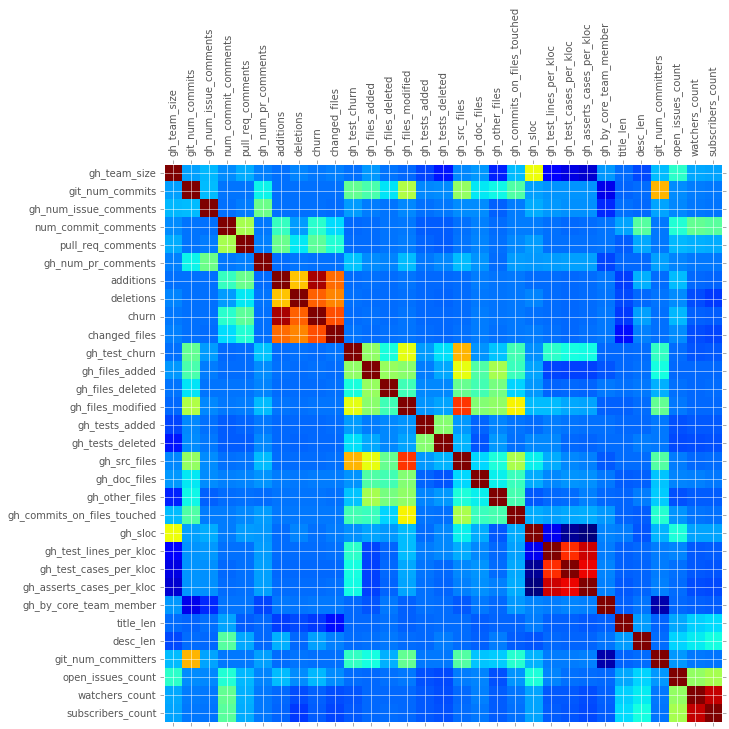

In [96]:
plot_corr(dropped_features)

# Merge time statistics

In [ ]:
plt.rcParams["figure.figsize"] = [6, 6]
data_to_graph = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])['delta_mins_merge']
plt.hist(data_to_graph, bins=50)
plt.title("Mins to Merge vs Counts")
plt.xlabel("Mins to Merge")
plt.ylabel("Number of pull requests")
plt.show()

In [ ]:
total_true_pull = len(pull_req_data[pull_req_data['delta_mins_merge'] != 0]['delta_mins_merge'])
accepted = pull_req_data[pull_req_data['delta_mins_merge'] != 0]['delta_mins_merge']
less_than_8 = len(accepted[accepted <= 480])
#percentage = (total_pull_req) / less_than_8
#print 'perce = %.2f' % percentage
print less_than_8
print total_true_pull
print 'perc = %.2f' % (float(less_than_8) / total_true_pull)

In [ ]:
#data_to_graph
bp = plt.boxplot(np.array(data_to_graph))
#bp['boxes'].set( color='#7570b3', linewidth=2)
#bp['boxes'].set( facecolor = '#1b9e77' )
#bp.show()
#bp['boxes']
plt.setp(bp['boxes'], color='Blue', linewidth=2)
plt.show()

In [ ]:
data_to_graph.describe()

# Part III: Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit
import pprint

# Trees Ensemble Feature Selection

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=1000,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
#print importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

scores = []
names = dropped_features.columns
# Print the feature ranking
#print 'Names = ', names
#print("Feature ranking:")
feature_labels = []
for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    scores.append((importances[indices[f]], names[indices[f]]))
    feature_labels.append(names[indices[f]])

pprint.pprint(sorted(scores, reverse=True))



In [ ]:
print X.shape[1]
print len(indices)
print len(names)

In [ ]:
# Plot the feature importances of the forest
#feature_labels[0] = 'pull_req_comments'
plt.rcParams["figure.figsize"] = [16, 8]
plt.figure()
plt.title("Feature importances from Tree-Based Selection")
plt.bar(range(X.shape[1]), 
         importances[indices],
        color="g", align="center")
        #yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
rand_for = RandomForestRegressor(n_estimators=50, max_depth=4)
scores = []
names = dropped_features.columns
for i in range(X.shape[1]):
    score = cross_val_score(rand_for, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
pprint.pprint(sorted(scores, reverse=True))

# Univariate Feature Selection

In [ ]:
ch2 = SelectKBest(chi2,"all")
X_train = ch2.fit_transform(X, Y)
top_ranked_features = sorted(enumerate(ch2.scores_),key=lambda x:x[1], reverse=True)[:32]
for index,(position,score) in enumerate(top_ranked_features):
    print '%d) %s' % (index+1, names[position])
#top_ranked_features

## Recursive Feature Elimination

In [ ]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
top_n_features = 10
# create the RFE model and select top 10 attributes
rfe = RFE(model, top_n_features)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

scores = []
for feature_name,rank in zip(names, rfe.ranking_):
    scores.append((feature_name, rank))

pprint.pprint(sorted(scores, key=lambda x:x[1]))


# Part IV: Modelling Phase

In [82]:
# Take only the representative features using previous phase
features = [
# 'num_commit_comments',
# 'desc_len',
# #'title_len',
# #'additions',
# 'churn',
# 'title_len',
# 'changed_files',
# #'deletions',
# # 'gh_test_lines_per_kloc',
# #'gh_sloc',
# 'open_issues_count',
# #'watchers_count',
# 'subscribers_count',
# #'pull_req_comments',
#  'gh_team_size'
    
    'churn',
    'additions',
    'deletions',
    'gh_sloc',
    'watchers_count',
    'desc_len',
    'open_issues_count',
    'num_commit_comments',
    'subscribers_count',
    'gh_team_size'
    
    
    
]
# 'gh_asserts_cases_per_kloc',
# 'pull_req_comments',
# 'gh_test_cases_per_kloc',
# 'gh_description_complexity',
# 'gh_team_size']
X_new = dropped_features[features]#.as_matrix().astype(np.float)
X_new.shape


(36660, 10)

In [83]:
first_portion = int(.40 * len(X_new))
print first_portion

X_train = X_new.head(first_portion)
X_test = X_new.tail(len(X_new) - first_portion)
y_train = Y[0:first_portion]
y_test = Y[first_portion:]



14664


In [84]:
#X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.20)
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(14664, 10)
(14664,)
(21996, 10)
(21996,)


In [85]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [86]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.74      0.09      0.16      7401
          1       0.68      0.98      0.80     14595

avg / total       0.70      0.68      0.59     21996

[[  664  6737]
 [  229 14366]]


0.68330605564648117

### k-Nearest Neighbor

In [87]:
# fit a logistic regression model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.47      0.23      0.31      7401
          1       0.69      0.87      0.77     14595

avg / total       0.62      0.65      0.62     21996

[[ 1737  5664]
 [ 1930 12665]]


0.65475541007455906

### Decision Trees

In [88]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(max_depth=40,criterion="entropy", min_samples_split=2)
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          0       0.49      0.33      0.40      7401
          1       0.71      0.82      0.76     14595

avg / total       0.64      0.66      0.64     21996

[[ 2457  4944]
 [ 2559 12036]]


0.65889252591380254

### Random Forests

In [89]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.59      0.30      0.39      7401
          1       0.71      0.89      0.79     14595

avg / total       0.67      0.69      0.66     21996

[[ 2199  5202]
 [ 1547 13048]]


0.69317148572467724

### Adaboost

In [ ]:
clf_random_forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=600)
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

In [ ]:
from sklearn import svm

### SVM 

In [ ]:
# fit a logistic regression model to the data
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

In [ ]:
plt.rcParams["figure.figsize"] = [12, 9]
dropped_features[features].hist()
plt.show()

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dropped_features[features], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
merged_desc = pull_req_data[pull_req_data['merged'] == True][["desc_len"]]
unmerged_desc = pull_req_data[pull_req_data['merged'] == False][["desc_len"]]

In [ ]:
unmerged_title_desc = pull_req_data[pull_req_data['merged'] == True][["title_len", "desc_len"]]

In [ ]:
d2 = np.concatenate( (np.array(merged_desc), np.array(unmerged_desc) ), 0)
bp = plt.boxplot(d2)
#bp['boxes'].set( color='#7570b3', linewidth=2)
#bp['boxes'].set( facecolor = '#1b9e77' )
#bp.show()
#bp['boxes']
plt.setp(bp['boxes'], color='Blue', linewidth=2)
plt.show()

In [ ]:
pull_req_data[pull_req_data['merged'] == False][["commits", "additions", "deletions"]].describe()

In [ ]:
pull_req_data[pull_req_data['merged'] == True][["commits", "additions", "deletions"]].describe()

In [ ]:
from sklearn.metrics import mean_squared_error

## Regression on merge times


In [ ]:
features_regr = [
'gh_team_size',
'gh_sloc',

    'churn',
    'additions',
    'deletions'
]
features_matrix = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])[features_regr]
target_column = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])['delta_mins_merge']

#print len(features_matrix)
#print len(target_column)

features_matrix['gh_sloc'] = np.log(features_matrix['gh_sloc'])
features_matrix['gh_team_size'] = np.log(features_matrix['gh_team_size'])
#features_matrix['subscribers_count'] = np.log(features_matrix['subscribers_count'])
#target_column

In [ ]:
first_portion = int(.60 * len(X))

X_train = features_matrix.head(first_portion)
X_test = features_matrix.tail(len(X) - first_portion)

y_train = target_column[0:first_portion]
y_test = target_column[first_portion:]

print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

In [ ]:
X = features_matrix.as_matrix().astype(np.float)
Y = np.array(target_column.apply(int))

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.Ridge (alpha = .5)

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
predicted = reg.predict(X_test)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((predicted - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

In [ ]:
pd.DataFrame(data=predicted).describe()

In [ ]:
# Create linear regression object
regr = linear_model.Lasso(alpha = 0.1)

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
predicted = regr.predict(X_test)

#predicted
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(predicted, y_test))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % reg.score(X_test, y_test))

In [ ]:
pd.DataFrame(data = [predicted, y_test]).transpose()